In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
import numpy as np

In [ ]:
# Charger le dataset IRIS
iris = sns.load_dataset('iris')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Selectionner la variavle d'interet (longueur des sépals)
sepal_length = iris['sepal_length']


2. Caractéristiques à calculer pour vérifier la normalité

In [ ]:

# Calcul du skewness et du kurtosis
skewness = stats.skew(sepal_length)
kurtoris = stats.kurtosis(sepal_length, fisher=False)
excess_kurtoris = stats.kurtosis(sepal_length)

print(f"Skewness: {skewness}")
print(f"Skewness: {kurtoris}")
print(f"Exces de kurtoris: {excess_kurtoris}")

Skewness: 0.3117530585022963
Skewness: 2.4264320510750235
Exces de kurtoris: -0.5735679489249765


Analyse
1. Le Skewness mesure si vos données sont "penchées" d'un côté.

* Résultat : 0,31 (Légèrement positif).
* Interprétation : Votre distribution est presque symétrique. Comme le chiffre est proche de 0, vos données sont bien équilibrées.

2. Kurtosis (Aplatissement)
Le Kurtosis mesure si votre distribution est "pointue" ou "plate".

* Kurtosis de Pearson (2,43) : La référence pour une loi normale est 3. Ici, vous êtes en dessous de 3.

* Excès de Kurtosis (-0,57) : C'est la mesure la plus utilisée (Fisher). Puisqu'elle est négative, on dit que la distribution est Platykurtique (plate).


"L'analyse de la forme montre que la longueur des sépales suit une distribution très saine. Avec un Skewness de 0,31, la répartition est quasiment symétrique. L'Excès de Kurtosis négatif (-0,57) indique une courbe légèrement plus plate qu'une loi normale, ce qui confirme l'absence de valeurs aberrantes extrêmes : les dimensions des fleurs sont concentrées de manière homogène."

# 3. Analyses Graphiques pour vérifier la normalité

3.1 Histogramme et courbe de densité

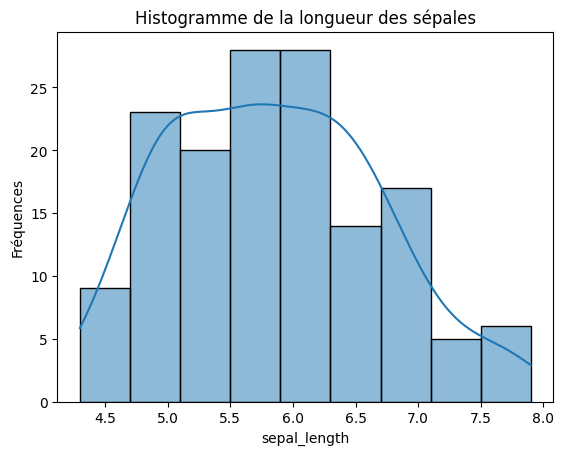

In [ ]:
#Histogramme
plt.figure()
sns.histplot(sepal_length, kde=True)
plt.title('Histogramme de la longueur des sépales')
plt.ylabel('Fréquences')
plt.show()

Analyse

Fréquences par classe
Classes les plus fréquentes : entre 5.5 et 6.5 cm (environ 27-28 observations dans la classe 5.5–6.0).

Classes moins fréquentes : aux extrêmes (4.5–5.0 et 7.5–8.0), avec seulement 9 et 6
observations respectivement.

La distribution décroît progressivement des deux côtés du mode central.

---
Si ce jeu de données provient du célèbre dataset Iris (comme le suggère sepal_length), alors :

Les longueurs des sépales varient principalement entre 4.5 et 8.0 cm.

La plupart des fleurs ont des sépales d’environ 5.5 à 6.0 cm.

La présence de quelques valeurs plus grandes (jusqu’à 8.0 cm) pourrait correspondre à l’espèce Iris virginica, tandis que les valeurs plus petites (autour de 4.5–5.0 cm) pourraient être associées à Iris setosa.

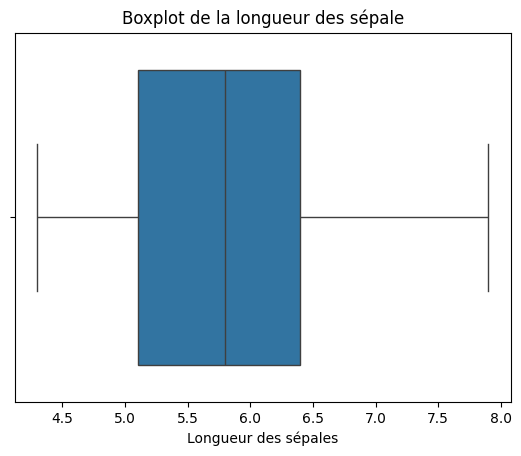

In [ ]:
#Boxplot
plt.figure()
sns.boxplot(x=sepal_length)
plt.title('Boxplot de la longueur des sépale')
plt.xlabel('Longueur des sépales')
plt.show()

Analyse
À partir du graphique :

Médiane (Q2) ≈ 5.8 cm → la moitié des observations sont inférieures à cette valeur, l’autre moitié supérieure.

Q1 (1er quartile) ≈ 5.1 cm

Q3 (3e quartile) ≈ 6.4 cm

IQR = Q3 – Q1 ≈ 1.3 cm → dispersion interquartile modérée.

Min (borne inférieure) ≈ 4.3 cm
Max (borne supérieure) ≈ 7.9 cm

---
Asymétrie et dispersion

Symétrie : la médiane est légèrement décalée vers le bas de la boîte → suggère une légère asymétrie positive (queue à droite), ce qui correspond à l’analyse précédente sur l’histogramme.

Dispersion : l’étendue totale (≈ 4.3 à 7.9 cm) est relativement large, mais la majorité des données (50 %) se concentrent dans un intervalle de 1.3 cm → bonne concentration autour de la médiane.

---
Conclusion

Le boxplot confirme les observations faites sur l’histogramme :
→ Distribution centrée autour de 5.8 cm,

→ légère asymétrie positive,

→ dispersion modérée (IQR ≈ 1.3 cm),

→ aucune valeur aberrante détectée.

**3.3** Q-Q plot

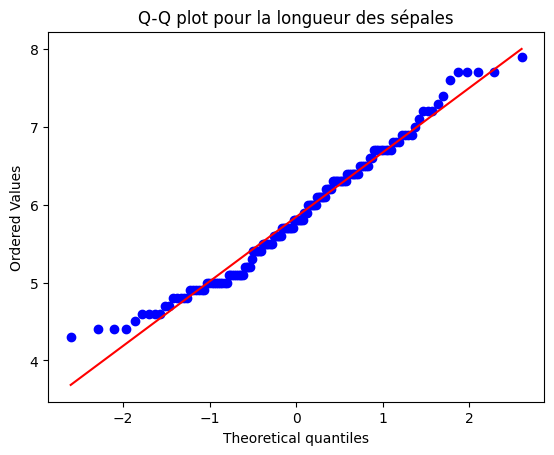

In [ ]:

plt.figure()
stats.probplot(sepal_length, plot=plt)
plt.title('Q-Q plot pour la longueur des sépales')
plt.show()